In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conditions = ['3 Low-Quality Clients', '4 Low-Quality Clients', 
              '6 Low-Quality Clients', '8 Low-Quality Clients', 
              '9 Low-Quality Clients']

In [ ]:
def process_file(file_path: str, total_runs: int, label: str, sep: str) -> tuple:

    df = pd.read_csv(file_path, sep=sep)
    
    full_coalition_value = 1111111111

    high_quality_pct = {cond: (10 - int(cond.split()[0])) / 10 * 100 for cond in conditions}
    
    stability_results = {}
    for cond in conditions:
        try:
            full_coalition_count = df.loc[df['Nash Equilibrium'] == full_coalition_value, cond].iloc[0]
        except KeyError as e:
            print(f"Key error: {e}. Available columns: {df.columns.tolist()}")
            raise
        stability_fraction = full_coalition_count / total_runs if total_runs > 0 else None
        stability_results[high_quality_pct[cond]] = stability_fraction

    sorted_results = dict(sorted(stability_results.items()))

    print(f"\n{label}")
    for hq, frac in sorted_results.items():
        print(f"{hq:.0f}% high-quality -> {frac * 100:.1f}% full coalition appeared as NE")

    x = list(sorted_results.keys())
    y = [v * 100 for v in sorted_results.values()]

    target_stability = 90  # target in percent
    eligible = [hq for hq, stability in sorted_results.items() if stability * 100 >= target_stability]
    if eligible:
        threshold = min(eligible)
        print(f"\nA lower-bound threshold is approximately {threshold:.0f}% high-quality data "
              f"for which the full coalition is stable at least {target_stability}% of the times.")

    return x, y





FedLR Spambase
10% high-quality -> 85.3% full coalition appeared as NE
20% high-quality -> 80.9% full coalition appeared as NE
40% high-quality -> 82.8% full coalition appeared as NE
60% high-quality -> 85.3% full coalition appeared as NE
70% high-quality -> 88.6% full coalition appeared as NE

FedFor Spambase
10% high-quality -> 99.5% full coalition appeared as NE
20% high-quality -> 99.6% full coalition appeared as NE
40% high-quality -> 100.0% full coalition appeared as NE
60% high-quality -> 99.9% full coalition appeared as NE
70% high-quality -> 99.9% full coalition appeared as NE

A lower-bound threshold is approximately 10% high-quality data for which the full coalition is stable at least 90% of the times.

FedLR HuGaDB
10% high-quality -> 100.0% full coalition appeared as NE
20% high-quality -> 100.0% full coalition appeared as NE
40% high-quality -> 100.0% full coalition appeared as NE
60% high-quality -> 100.0% full coalition appeared as NE
70% high-quality -> 100.0% full co

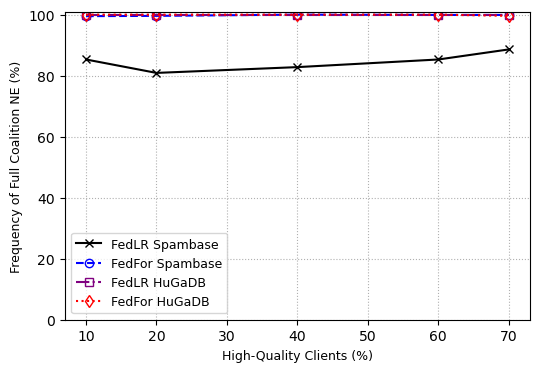

In [16]:
experiments = [
    { "file": "../results/plots/fedlr_spambase_lqc_1000.csv", "total_runs": 1000, "label": "FedLR Spambase", "sep": "," },
    { "file": "../results/plots/fedfor_spambase_lqc_1000.csv", "total_runs": 1000, "label": "FedFor Spambase", "sep": "," },
    { "file": "../results/plots/fedlr_huga_lqc_1000.csv", "total_runs": 1000, "label": "FedLR HuGaDB", "sep": ";" },
    { "file": "../results/plots/fedfor_huga_lqc_1000.csv", "total_runs": 1000, "label": "FedFor HuGaDB", "sep": ";" }
]

combined_data = []

for exp in experiments:
    x, y = process_file(exp["file"], exp["total_runs"], exp["label"], exp["sep"])
    combined_data.append((x, y, exp["label"]))
    
    # plt.figure()  
    # plt.plot(x, y, marker='o')
    # plt.xlabel("High-Quality Clients (%)")
    # plt.ylabel("Frequency of Full Coalition NE (%)")
    # plt.title(f"{exp['label']}: Full Coalition Stability vs. High-Quality Data")
    # plt.grid(True)
    # plt.show()

plt.figure(figsize=(6, 4))
markers = ['x', 'o', 's', 'd', '*', 'v', '^', '<', '>', 'h', 'D']
colors = ['k', 'b', 'purple', 'red', 'm', 'y', 'cyan']
linestyles = ['-', '--', '-.', ':']  

for i, ((x, y, label), marker) in enumerate(zip(combined_data, markers)):
    ls = linestyles[i % len(linestyles)]
    plt.plot(x, y, marker=marker, linestyle=ls, label=label, color=colors[i % len(colors)], fillstyle='none')

plt.yticks(np.arange(0, 101, 20))
# plt.xticks(np.arange(0, 101, 20))
plt.xlabel("High-Quality Clients (%)", fontsize=9)
plt.ylabel("Frequency of Full Coalition NE (%)", fontsize=9)
plt.grid(linestyle=':')
plt.legend(fontsize=9)
plt.show()